In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
df=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/mnist_train.csv")

In [3]:
print(df.shape)

(60000, 785)


In [4]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [5]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data=df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [8]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [9]:
split=int(0.8*X.shape[0])
print(split)

48000


In [10]:
X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


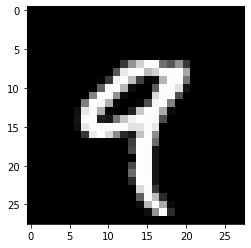

9


In [13]:
#Visualize some sample

def draw_img(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
draw_img(X_train[4])
print(Y_train[4])

## KNN Algorithm

In [14]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,QueryPoint,k=5):
    
    vals=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(QueryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    #Nearest k points to the given point
    vals=vals[:k]
    
    vals=np.array(vals)
    #print(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

## Prediction

In [21]:
pred=knn(X_train,Y_train,X_test[1])
print(int(pred))

(array([7.]), array([5], dtype=int64))
7


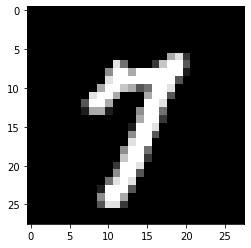

7


In [20]:
draw_img(X_test[1])
print(Y_test[1])

In [ ]:
correctCase = 0
for i in range(X_test.shape[0]):
    pred = knn(X_train,Y_train,X_test[i])
    if pred == Y_test[i]:
        correctCase += 1

accuracy = (correctCase) / (len(X_test))
print(accuracy)